In [1]:
#importing libraries and dataset
import pandas as pd
import torch
import numpy as np
from mp_api.client import MPRester

with MPRester("3LamNu9zdktojYff9GN8uXgO0YDTrhlz") as mpr:
    docs = mpr.materials.summary.search(band_gap=(0.00001,None))

No module named 'phonopy'
No module named 'phonopy'


Retrieving SummaryDoc documents:   0%|          | 0/81004 [00:00<?, ?it/s]

c:\Users\enlb2\anaconda3\Lib\site-packages\mp_api\client\core\client.py:829: UserWarning: Use the 'fields' argument to select only fields of interest to speed up data retrieval for large queries. Choose from: ['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_form

In [2]:
#initializing lists
mean_atomic_numbers = []
max_atomic_numbers = []
min_atomic_numbers = []
std_atomic_numbers = []

a_parameters = []
b_parameters = []
c_parameters = []
alpha_parameters = []
beta_parameters = []
gamma_parameters = []

mean_distance_matrix = []
max_distance_matrix = []
min_distance_matrix = []
std_distance_matrix = []

band_gaps = []

input = []

In [4]:
#Preproccessing of data
for i in range(len(docs)):
    mean_atomic_numbers += [np.mean(docs[i].structure.atomic_numbers)]
    max_atomic_numbers += [np.max(docs[i].structure.atomic_numbers)]
    min_atomic_numbers += [np.min(docs[i].structure.atomic_numbers)]
    std_atomic_numbers += [np.std(docs[i].structure.atomic_numbers)]

    # Lattice parameters:
    a_parameters += [docs[i].structure.lattice.abc[0]]
    b_parameters += [docs[i].structure.lattice.abc[1]]
    c_parameters += [docs[i].structure.lattice.abc[2]]
    alpha_parameters += [docs[i].structure.lattice.angles[0]]
    beta_parameters += [docs[i].structure.lattice.angles[1]]
    gamma_parameters += [docs[i].structure.lattice.angles[2]]

    mean_distance_matrix += [np.mean(docs[i].structure.distance_matrix)]
    max_distance_matrix += [np.max(docs[i].structure.distance_matrix)]
    min_distance_matrix += [np.min(docs[i].structure.distance_matrix)]
    std_distance_matrix += [np.std(docs[i].structure.distance_matrix)]

    band_gaps.append([docs[i].band_gap])
    input.append([mean_atomic_numbers[i],max_atomic_numbers[i],min_atomic_numbers[i],std_atomic_numbers[i],a_parameters[i],b_parameters[i],c_parameters[i],alpha_parameters[i],beta_parameters[i],gamma_parameters[i],mean_distance_matrix[i],max_distance_matrix[i],min_distance_matrix[i],std_distance_matrix[i]])



In [8]:
#Converting the input into a tensor

input = torch.tensor(input, dtype = torch.float32)
band_gaps = torch.tensor(band_gaps, dtype = torch.float32)

torch.save(input, "C:\\Users\enlb2\OneDrive\Documents\GitHub\GCNN-To-Predict-Band-Gap\\input_tensor.pt")
torch.save(band_gaps, "C:\\Users\enlb2\OneDrive\Documents\GitHub\GCNN-To-Predict-Band-Gap\\band_gaps.pt")

C:\Users\enlb2\AppData\Local\Temp\ipykernel_39852\3085147299.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(input, dtype = torch.float32)
C:\Users\enlb2\AppData\Local\Temp\ipykernel_39852\3085147299.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  band_gaps = torch.tensor(band_gaps, dtype = torch.float32)


In [1]:
#More library imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ANN
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(14, 250)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(250, 500)
        self.dropout2 = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(500, 750)
        self.dropout3 = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(750, 500)
        self.dropout4 = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()
        self.fc5 = nn.Linear(500,100)
        self.dropout5 = nn.Dropout(p=0.5)
        self.relu =nn.ReLU()
        self.fc6 = nn.Linear(100,1)


    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.dropout4(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.dropout3(x)
        x = self.fc6(x)

        return x

In [ ]:
#For testing the code purposes
import random

input_tensor = torch.load("tensor_files/input_tensor.pt")
band_gaps = torch.load("tensor_files/band_gaps.pt")

small_input =[]
small_band_gaps =[]
inputlist = input.tolist()
band_gapslist = band_gaps.tolist()
for i in range(100):
    random_i = random.randint(0,len(docs))
    small_input.append(inputlist[i])
    small_band_gaps.append(band_gapslist[i])

small_input = torch.tensor(small_input)
small_band_gaps = torch.tensor(small_band_gaps)


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the tensors from files
input_tensor = torch.load("input_tensor.pt")
band_gaps = torch.load("band_gaps.pt")

# Define the scenarios to test
scenarios = [
    # (1e-4, 64, 100),
    # (5e-4, 64, 100),
    # (1e-3, 64, 100),
    # (5e-3, 64, 100),
    # (1e-4, 128, 100),
    # (1e-4, 256, 100),
    # (1e-4, 512, 100),
    (1e-4, 64, 100),
    (1e-4, 64, 200),
    (1e-4, 64, 500)
]

# Create a file to save the print statements
with open("scenario_results_1.txt", "w") as f:
    # Train and evaluate the model for each scenario
    for lr, batch_size, epochs in scenarios:
        print(f"Testing scenario: Learning rate={lr}, Batch size={batch_size}, Epochs={epochs}", file=f)

        # Train-test split
        X_train, X_temp, y_train, y_temp = train_test_split(input_tensor, band_gaps, test_size=0.3, random_state=64)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64)

        # Move the data to the GPU if available
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        X_train, y_train = X_train.to(device), y_train.to(device)
        X_val, y_val = X_val.to(device), y_val.to(device)
        X_test, y_test = X_test.to(device), y_test.to(device)

        # Create the model, loss function, and optimizer
        model = RegressionNN().to(device)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

        # Create the data loaders
        train_dataset = TensorDataset(X_train, y_train)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_dataset = TensorDataset(X_val, y_val)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        test_dataset = TensorDataset(X_test, y_test)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Train the model
        train_losses = []
        val_losses = []
        train_mses = []
        val_mses = []
        train_maes = []
        val_maes = []
        train_r2s = []
        val_r2s = []

        for epoch in range(epochs):
            model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            model.eval()
            with torch.no_grad():
                train_loss = 0.0
                train_mse = 0.0
                train_mae = 0.0
                train_r2 = 0.0
                for train_inputs, train_labels in train_loader:
                    train_outputs = model(train_inputs)
                    train_loss += criterion(train_outputs, train_labels).item()
                    train_mse += nn.functional.mse_loss(train_outputs, train_labels).item()
                    train_mae += nn.functional.l1_loss(train_outputs, train_labels).item()
                    train_r2 += r2_score(train_labels.cpu().numpy(), train_outputs.cpu().numpy())

                avg_train_loss = train_loss / len(train_loader)
                avg_train_mse = train_mse / len(train_loader)
                avg_train_mae = train_mae / len(train_loader)
                avg_train_r2 = train_r2 / len(train_loader)

                val_loss = 0.0
                val_mse = 0.0
                val_mae = 0.0
                val_r2 = 0.0
                for val_inputs, val_labels in val_loader:
                    val_outputs = model(val_inputs)
                    val_loss += criterion(val_outputs, val_labels).item()
                    val_mse += nn.functional.mse_loss(val_outputs, val_labels).item()
                    val_mae += nn.functional.l1_loss(val_outputs, val_labels).item()
                    val_r2 += r2_score(val_labels.cpu().numpy(), val_outputs.cpu().numpy())

                avg_val_loss = val_loss / len(val_loader)
                avg_val_mse = val_mse / len(val_loader)
                avg_val_mae = val_mae / len(val_loader)
                avg_val_r2 = val_r2 / len(val_loader)

            train_losses.append(avg_train_loss)
            val_losses.append(avg_val_loss)
            train_mses.append(avg_train_mse)
            val_mses.append(avg_val_mse)
            train_maes.append(avg_train_mae)
            val_maes.append(avg_val_mae)
            train_r2s.append(avg_train_r2)
            val_r2s.append(avg_val_r2)

            if (epoch + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Train MSE: {avg_train_mse:.4f}, Val MSE: {avg_val_mse:.4f}, Train MAE: {avg_train_mae:.4f}, Val MAE: {avg_val_mae:.4f}, Train R2: {avg_train_r2:.4f}, Val R2: {avg_val_r2:.4f}', file=f)

        # Evaluate the model on the test set
        model.eval()
        with torch.no_grad():
            test_loss = 0.0
            test_mse = 0.0
            test_mae = 0.0
            test_r2 = 0.0
            for test_inputs, test_labels in test_loader:
                test_outputs = model(test_inputs)
                test_loss += criterion(test_outputs, test_labels).item()
                test_mse += nn.functional.mse_loss(test_outputs, test_labels).item()
                test_mae += nn.functional.l1_loss(test_outputs, test_labels).item()
                test_r2 += r2_score(test_labels.cpu().numpy(), test_outputs.cpu().numpy())

            avg_test_loss = test_loss / len(test_loader)
            avg_test_mse = test_mse / len(test_loader)
            avg_test_mae = test_mae / len(test_loader)
            avg_test_r2 = test_r2 / len(test_loader)

        print(f"Test Loss: {avg_test_loss:.4f}, Test MSE: {avg_test_mse:.4f}, Test MAE: {avg_test_mae:.4f}, Test R2: {avg_test_r2:.4f}", file=f)


Epoch [100/1000]
Model 1 - Epoch [100/1000], Train Loss: 2.0449, Val Loss: 2.0567, Train R2: 0.1402, Val R2: 0.1391
Model 2 - Epoch [100/1000], Train Loss: 2.0950, Val Loss: 2.1045, Train R2: 0.1198, Val R2: 0.1199
Model 3 - Epoch [100/1000], Train Loss: 2.1819, Val Loss: 2.1936, Train R2: 0.0837, Val R2: 0.0824
Epoch [200/1000]
Model 1 - Epoch [200/1000], Train Loss: 1.9442, Val Loss: 1.9605, Train R2: 0.1824, Val R2: 0.1795
Model 2 - Epoch [200/1000], Train Loss: 1.9206, Val Loss: 1.9416, Train R2: 0.1927, Val R2: 0.1878
Model 3 - Epoch [200/1000], Train Loss: 1.9556, Val Loss: 1.9790, Train R2: 0.1782, Val R2: 0.1722
Epoch [300/1000]
Model 1 - Epoch [300/1000], Train Loss: 1.8795, Val Loss: 1.9060, Train R2: 0.2097, Val R2: 0.2025
Model 2 - Epoch [300/1000], Train Loss: 1.8324, Val Loss: 1.8701, Train R2: 0.2298, Val R2: 0.2176
Model 3 - Epoch [300/1000], Train Loss: 1.8618, Val Loss: 1.8966, Train R2: 0.2175, Val R2: 0.2066
Epoch [400/1000]
Model 1 - Epoch [400/1000], Train Loss: 1

<Figure size 640x480 with 0 Axes>

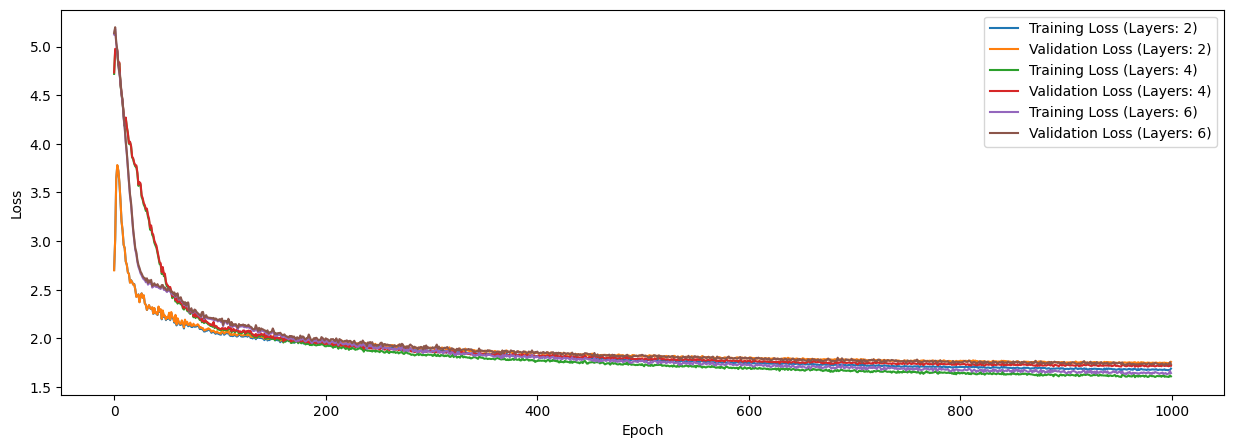

<Figure size 640x480 with 0 Axes>

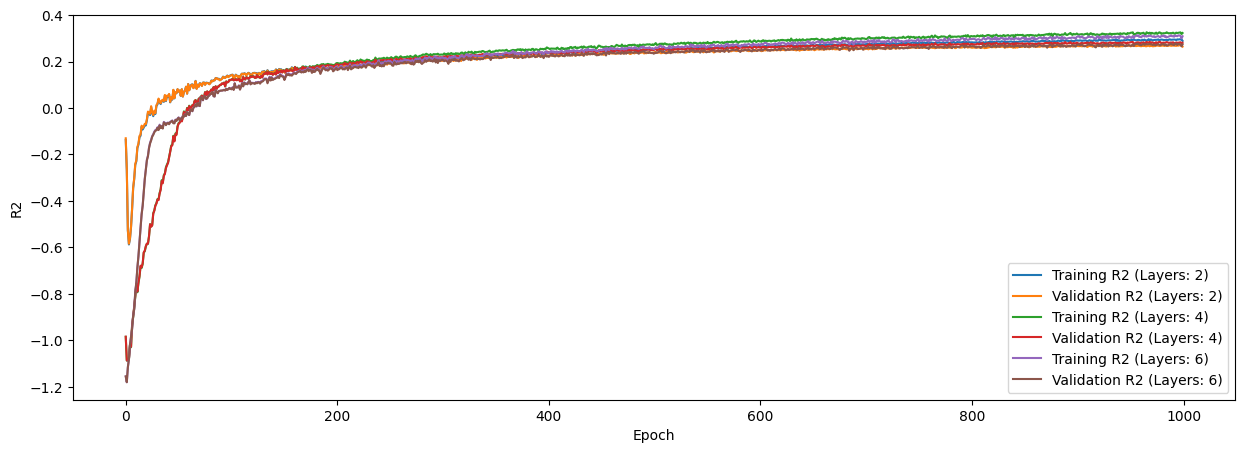

In [15]:
#Ensemble training code

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

class RegressionNN(nn.Module):
    def __init__(self, num_layers):
        super(RegressionNN, self).__init__()
        self.num_layers = num_layers
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(14, 250))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(p=0.5))
        
        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(250, 250))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(p=0.5))
        
        self.layers.append(nn.Linear(250, 1))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Initialize models
models = [RegressionNN(num_layers) for num_layers in [2, 4, 6]]

# Train on gpu and splitting up the data to training, validation and testing.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train, X_temp, y_train, y_temp = train_test_split(input, band_gaps, test_size=0.3, random_state=64)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64)

for model in models:
    model.to(device)

criterion = nn.MSELoss()
optimizers = [optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5) for model in models]

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

# Training the models
num_epochs = 1000

train_losses = [[] for _ in range(len(models))]
val_losses = [[] for _ in range(len(models))]
train_r2s = [[] for _ in range(len(models))]
val_r2s = [[] for _ in range(len(models))]

for epoch in range(num_epochs):
    for model_idx, model in enumerate(models):
        model.train()
        optimizer = optimizers[model_idx]
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device).float(), labels.to(device).float()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            train_loss = 0.0
            train_r2 = 0.0
            total_train = 0
            for train_inputs, train_labels in train_loader:
                train_inputs, train_labels = train_inputs.to(device).float(), train_labels.to(device).float()
                train_outputs = model(train_inputs)
                train_loss += criterion(train_outputs, train_labels).item()
                train_r2 += r2_score(train_labels.cpu().numpy(), train_outputs.cpu().numpy())

            avg_train_loss = train_loss / len(train_loader)
            avg_train_r2 = train_r2 / len(train_loader)

            val_loss = 0.0
            val_r2 = 0.0
            total_val = 0
            for val_inputs, val_labels in val_loader:
                val_inputs, val_labels = val_inputs.to(device).float(), val_labels.to(device).float()
                val_outputs = model(val_inputs)
                val_loss += criterion(val_outputs, val_labels).item()
                val_r2 += r2_score(val_labels.cpu().numpy(), val_outputs.cpu().numpy())

            avg_val_loss = val_loss / len(val_loader)
            avg_val_r2 = val_r2 / len(val_loader)

            train_losses[model_idx].append(avg_train_loss)
            val_losses[model_idx].append(avg_val_loss)
            train_r2s[model_idx].append(avg_train_r2)
            val_r2s[model_idx].append(avg_val_r2)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        for model_idx, model in enumerate(models):
            print(f'Model {model_idx + 1} - Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[model_idx][-1]:.4f}, Val Loss: {val_losses[model_idx][-1]:.4f}, Train R2: {train_r2s[model_idx][-1]:.4f}, Val R2: {val_r2s[model_idx][-1]:.4f}')

plt.clf()

# Plotting the training and validation loss curves
plt.figure(figsize=(15, 5))
for i in range(len(models)):
    plt.plot(train_losses[i], label=f'Training Loss (Layers: {2*i+2})')
    plt.plot(val_losses[i], label=f'Validation Loss (Layers: {2*i+2})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Plotting the training and validation R2 curves
plt.figure(figsize=(15, 5))
for i in range(len(models)):
    plt.plot(train_r2s[i], label=f'Training R2 (Layers: {2*i+2})')
    plt.plot(val_r2s[i], label=f'Validation R2 (Layers: {2*i+2})')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()
plt.show()
